### Importation et lecture des données

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("actifs_pivot.csv", index_col = 0)
df.head()

,3I GROUP PLC,3M CO,A2A SpA,AAC Technologies Holdings Inc,ABACUS PROPERTY GROUP,ABB LTD-REG,ABBOTT LABORATORIES,ABBVIE INC,ABC-MART INC,ABERCROMBIE & FITCH CO-CL A,...,Yamato Holdings Co Ltd,Yuanta Financial Holding Co Lt,ZENKOKU HOSHO CO LTD,ZEON CORP,ZIONS BANCORPORATION,ZOETIS INC,Zensho Holdings Co Ltd,Zimmer Biomet Holdings Inc,Zurich Insurance Group AG,kyowa Hakko Kirin Co Ltd
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-14,4.00200,141.60,0.8370,43.00,2.48,21.21,39.93,52.87,4875.0,51.01,...,2275.0,15.25,2615.0,877.0,67.65,81.03,1009.0,124.94,258.0,1210.0
2014-05-15,3.87600,140.98,0.8115,43.00,2.49,21.07,39.24,52.69,4795.0,49.96,...,2233.0,15.25,2545.0,901.0,66.99,79.03,1016.0,122.56,259.5,1199.0
2014-05-16,3.79300,141.13,0.8050,43.00,2.45,21.09,39.06,52.93,4840.0,49.84,...,2225.0,15.30,2540.0,886.0,66.53,79.74,1014.0,123.03,262.9,1181.0
2014-05-19,3.79300,141.67,0.8050,42.95,2.44,21.09,39.63,54.11,4885.0,50.39,...,2218.0,15.25,2493.0,869.0,66.51,80.21,1005.0,123.81,262.9,1198.0
2014-05-20,3.80234,140.23,0.8405,42.35,2.43,21.15,39.54,53.54,4875.0,49.66,...,2179.0,15.10,2459.0,873.0,66.31,79.61,1001.0,121.26,264.3,1206.0


Une forme de normalisation pour faciliter la lecture (tous les actifs sont ramenés à 1 au temps 0).

In [14]:
df = df.apply(lambda x : x/float(x.iloc[0]))

### Recherche des outliers

On commence simplement par regarder écart type pour voir si de grandes tendances se dégagent.

In [26]:
outliers = df.describe().iloc[2,:].nlargest(20).index.values
print(df.describe().iloc[2,:].nlargest(20))

SHOWA DENKO K K                 14.304060
MORINAGA & CO LTD               11.208568
Furukawa Electric Co Ltd        10.240794
DAINIPPON SCREEN MFG CO LTD      8.505486
ALL NIPPON AIRWAYS CO LTD        7.842287
UBE INDUSTRIES LTD               7.573325
St Barbara Ltd                   7.239013
SEMICONDUCTOR MANUFACTURING      7.188382
NIPPON STEEL & SUMIKIN BUSSA     7.031551
LYNAS CORP LTD                   7.011574
INMOBILIARIA COLONIAL SA         6.469133
NIPPON EXPRESS CO LTD            6.320510
DIC Corp                         6.208520
KUMAGAI GUMI CO LTD              5.648500
AOZORA BANK LTD                  5.622151
ABIOMED INC                      5.495611
SANKYU INC                       5.241882
KINTETSU CORP                    5.190165
MITSUI CHEMICALS INC             5.024207
MITSUMATERIALS CORP              4.888813
Name: std, dtype: float64


In [19]:
plt.clf()
plt.show()

<Figure size 432x288 with 0 Axes>

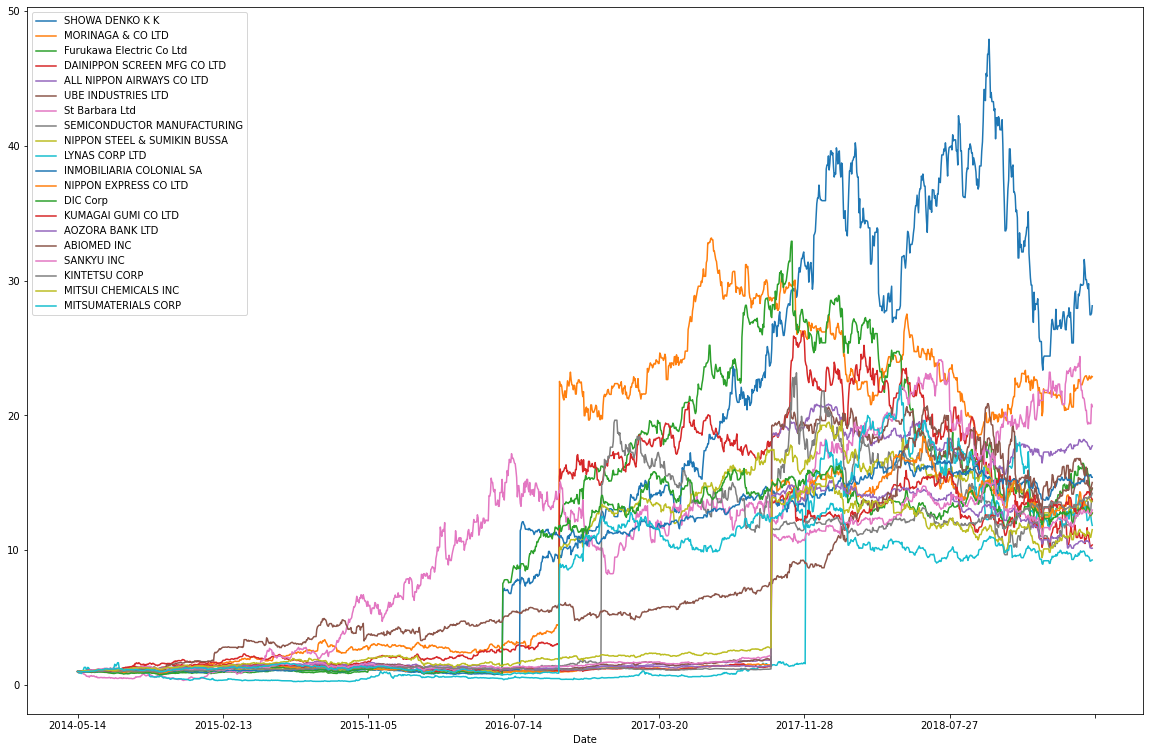

In [37]:
df[outliers].plot(figsize=(20,13))

On remarque des sauts brutaux de valeurs que l'on suppose correspondre à des opérations purement artificielles de restructuration de la capitalisation des entreprise (stocks splits/reverse splits). Nous choisissons donc d'implémenter une méthode qui nous permet de supprimer les actions au cours non représentatif afin d'éviter de fausser notre analyse.

*Remarque* : dans ce jeu de données, ces anomalies sont d'autant plus courantes pour les actions sur les places boursières japonnaises.

In [94]:
def outlier_detector(s):
    d = pd.Series(np.divide((s.values[1:] - s.values[:-1]),(s.values[:-1])) , index=s.index[:-1]).abs()
    return (d.max() > 0.5) # 0.5 ici arbitraire.
    

In [98]:
print(outlier_detector(df['MORINAGA & CO LTD']))
print(outlier_detector(df['St Barbara Ltd']))

True
False


In [102]:
df.loc[:,df.apply(outlier_detector)]

,AES CORP,AIN PHARMACIEZ INC,ALFRESA HOLDINGS CORP,ALL NIPPON AIRWAYS CO LTD,ALNYLAM PHARMACEUTICALS INC,AMOREPACIFIC CORP,AOZORA BANK LTD,ARCH CAPITAL GROUP LTD,ASAHI GLASS CO LTD,ASSA ABLOY AB-B,...,Vifor Pharma AG,WARTSILA OYJ ABP,WEICHAI POWER CO LTD-H,WHARF HOLDINGS LTD,WILLIAM DEMANT HOLDING,Welcia Holdings Co Ltd,Willis Towers Watson PLC,Windstream Holdings Inc,YAOKO CO LTD,YOKOHAMA RUBBER CO LTD
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000
2014-05-15,0.991943,1.002255,0.954397,1.004386,1.004233,0.971314,1.006579,0.992770,1.005396,0.981659,...,0.974721,0.972619,0.987319,1.008295,0.989631,0.977848,0.995197,1.0087,1.011259,0.988839
2014-05-16,0.999163,1.001127,0.949511,0.982456,1.010582,0.967312,1.000000,0.996473,0.994604,0.972052,...,0.974721,0.960238,0.980072,1.011982,0.989631,0.976266,1.006004,1.0190,0.987718,0.965402
2014-05-19,1.002093,0.997745,0.951140,0.982456,1.027513,0.929286,1.003289,0.997179,0.989209,0.972052,...,0.974721,0.960238,0.974638,0.993548,0.989631,0.976266,1.006964,1.0232,0.984647,0.948661
2014-05-20,0.989850,1.018038,0.938111,0.995614,0.966314,0.968646,0.990132,0.998237,0.994604,0.970015,...,0.994121,0.982857,0.972826,0.994470,0.977069,0.977848,0.999039,1.0096,0.983623,0.958705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-07,0.977085,1.767756,0.532573,17.679825,1.470370,0.131087,10.542763,0.568506,7.032374,0.558661,...,0.147090,0.333929,0.423913,0.459908,0.393021,0.601266,4.087416,0.1470,1.154555,2.357143
2019-03-08,0.971644,1.781285,0.525244,17.491228,1.468607,0.131755,10.180921,0.566214,6.861511,0.564047,...,0.145385,0.325595,0.403623,0.443318,0.391426,0.580696,4.063881,0.1468,1.148414,2.272321
2019-03-10,0.971644,1.781285,0.525244,17.491228,1.468607,0.131755,10.180921,0.566214,6.861511,0.564047,...,0.145385,0.325595,0.403623,0.443318,0.391426,0.580696,4.063881,0.1468,1.148414,2.272321


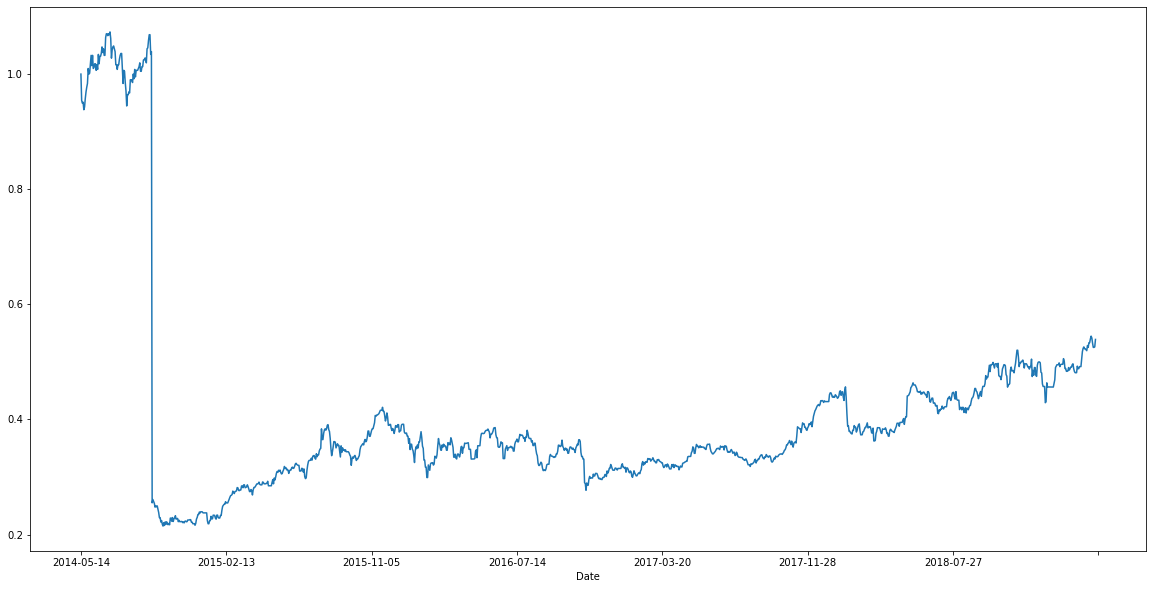

In [107]:
df['ALFRESA HOLDINGS CORP'].plot(figsize=(20,10)) #a titre d'exemple

### Donnée nettoyée

In [114]:
df = df.loc[:,~df.apply(outlier_detector)] #~ correspond à la sélection inverse/complémentaire

In [115]:
df

,3I GROUP PLC,3M CO,A2A SpA,AAC Technologies Holdings Inc,ABACUS PROPERTY GROUP,ABB LTD-REG,ABBOTT LABORATORIES,ABBVIE INC,ABC-MART INC,ABERCROMBIE & FITCH CO-CL A,...,Yamato Holdings Co Ltd,Yuanta Financial Holding Co Lt,ZENKOKU HOSHO CO LTD,ZEON CORP,ZIONS BANCORPORATION,ZOETIS INC,Zensho Holdings Co Ltd,Zimmer Biomet Holdings Inc,Zurich Insurance Group AG,kyowa Hakko Kirin Co Ltd
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-05-15,0.968516,0.995621,0.969534,1.000000,1.004032,0.993399,0.982720,0.996595,0.983590,0.979416,...,0.981538,1.000000,0.973231,1.027366,0.990244,0.975318,1.006938,0.980951,1.005814,0.990909
2014-05-16,0.947776,0.996681,0.961768,1.000000,0.987903,0.994342,0.978212,1.001135,0.992821,0.977063,...,0.978022,1.003279,0.971319,1.010262,0.983444,0.984080,1.004955,0.984713,1.018992,0.976033
2014-05-19,0.947776,1.000494,0.961768,0.998837,0.983871,0.994342,0.992487,1.023454,1.002051,0.987846,...,0.974945,1.000000,0.953346,0.990878,0.983149,0.989880,0.996036,0.990956,1.018992,0.990083
2014-05-20,0.950110,0.990325,1.004182,0.984884,0.979839,0.997171,0.990233,1.012673,1.000000,0.973535,...,0.957802,0.990164,0.940344,0.995439,0.980192,0.982476,0.992071,0.970546,1.024419,0.996694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-07,2.392804,1.411441,1.917563,1.148837,1.491935,0.900754,1.923366,1.479856,1.347692,0.193491,...,1.296264,1.154098,1.592734,1.294185,1.483370,1.188078,2.645193,1.363615,1.265116,1.879339
2019-03-08,2.354323,1.418715,1.922342,1.106977,1.487903,0.890853,1.919108,1.467373,1.331282,0.184670,...,1.278242,1.140984,1.562141,1.231471,1.477605,1.195113,2.618434,1.352889,1.262791,1.863636
2019-03-10,2.354323,1.418715,1.922342,1.106977,1.487903,0.890853,1.919108,1.467373,1.331282,0.184670,...,1.278242,1.140984,1.562141,1.231471,1.477605,1.195113,2.618434,1.352889,1.262791,1.863636


### Sélection du portefeuille

In [128]:
mapping = pd.read_csv("actifs_dico.csv", index_col = 0)

In [135]:
mapping.Sector.drop_duplicates()

Name
TOTAL SA                                        Energy
Sanofi                                     Health Care
LVMH MOET HENNESSY LOUIS VUI    Consumer Discretionary
Airbus Group NV                            Industrials
L'OREAL                               Consumer Staples
BNP PARIBAS                                 Financials
AIR LIQUIDE SA                               Materials
Orange                          Communication Services
ENGIE                                        Utilities
UNIBAIL-RODAMCO SE                         Real Estate
DASSAULT SYSTEMES SA            Information Technology
Name: Sector, dtype: object